# Cell 1: Load Libraries and Dataset


In [1]:
#  Load Libraries and Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv(r'C:\Users\Abhishek\Decoding silent signals/coords.csv')
df.head()


,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
0,Happy,0.589003,0.547059,-1.029290,0.999916,0.612927,0.475126,-0.961747,0.999786,0.630385,...,-0.009972,0.0,0.664463,0.473935,0.013665,0.0,0.668614,0.468422,0.014069,0.0
1,Happy,0.589162,0.551955,-1.398352,0.999872,0.613001,0.476131,-1.327746,0.999681,0.630656,...,-0.009149,0.0,0.668408,0.476480,0.015565,0.0,0.672808,0.470569,0.016157,0.0
2,Happy,0.589769,0.553533,-1.403986,0.999847,0.613633,0.476139,-1.331189,0.999618,0.631390,...,-0.009603,0.0,0.670349,0.477702,0.015049,0.0,0.674833,0.471878,0.015586,0.0
3,Happy,0.590551,0.554900,-1.421452,0.999825,0.614346,0.476147,-1.348178,0.999563,0.632101,...,-0.009417,0.0,0.670832,0.477348,0.015392,0.0,0.675219,0.471573,0.015940,0.0
4,Happy,0.592372,0.555785,-1.409356,0.999796,0.615497,0.476143,-1.337463,0.999487,0.632989,...,-0.008762,0.0,0.671190,0.477990,0.016065,0.0,0.675584,0.471969,0.016672,0.0


# Cell 2: Dataset Info

In [2]:
#  Basic Information
print("Shape of data:", df.shape)
df.info()


Shape of data: (598, 2005)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Columns: 2005 entries, class to v501
dtypes: float64(2004), object(1)
memory usage: 9.1+ MB


# Cell 3: Class Distribution


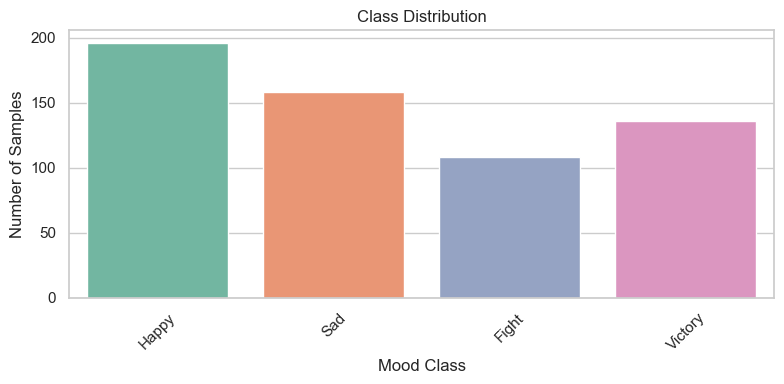

In [3]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='class', palette='Set2')
plt.title('Class Distribution')
plt.xlabel('Mood Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Cell 4: Missing Values Check

In [4]:
missing = df.isnull().sum().sum()
print("Total missing values in dataset:", missing)


Total missing values in dataset: 0


# Cell 5: Summary Statistics

In [5]:
numerical_df = df.drop('class', axis=1)
numerical_df.describe()


,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,...,598.000000,598.0,598.000000,598.000000,598.000000,598.0,598.000000,598.000000,598.000000,598.0
mean,0.590978,0.513515,-1.284994,0.999476,0.611007,0.433548,-1.218933,0.998687,0.627399,0.431678,...,-0.011366,0.0,0.654657,0.419159,0.014519,0.0,0.659276,0.413470,0.015282,0.0
std,0.034229,0.118741,0.287804,0.000566,0.035568,0.112905,0.305877,0.001451,0.036581,0.112993,...,0.009525,0.0,0.042301,0.110342,0.013906,0.0,0.042801,0.109602,0.014512,0.0
min,0.467176,0.332478,-1.783911,0.997958,0.485695,0.263231,-1.758823,0.994141,0.503374,0.263127,...,-0.033631,0.0,0.518033,0.243179,-0.024439,0.0,0.521275,0.239159,-0.025643,0.0
25%,0.588884,0.374807,-1.575487,0.999261,0.612230,0.303140,-1.545583,0.998196,0.629959,0.301180,...,-0.019914,0.0,0.651677,0.285720,0.012546,0.0,0.656059,0.281205,0.013632,0.0
50%,0.600874,0.562725,-1.256199,0.999673,0.622162,0.473799,-1.180881,0.999172,0.639146,0.471496,...,-0.007088,0.0,0.670736,0.461750,0.020985,0.0,0.675448,0.455219,0.022139,0.0
75%,0.608779,0.644705,-1.101399,0.999963,0.625854,0.560005,-1.014991,0.999936,0.641739,0.558429,...,-0.004671,0.0,0.677367,0.542675,0.023700,0.0,0.682787,0.536208,0.024896,0.0
max,0.666169,0.669042,-0.496335,0.999997,0.686333,0.588153,-0.418815,0.999991,0.703907,0.586071,...,-0.000212,0.0,0.733779,0.570200,0.028856,0.0,0.737714,0.563353,0.030520,0.0


# Cell 6: PCA Visualization

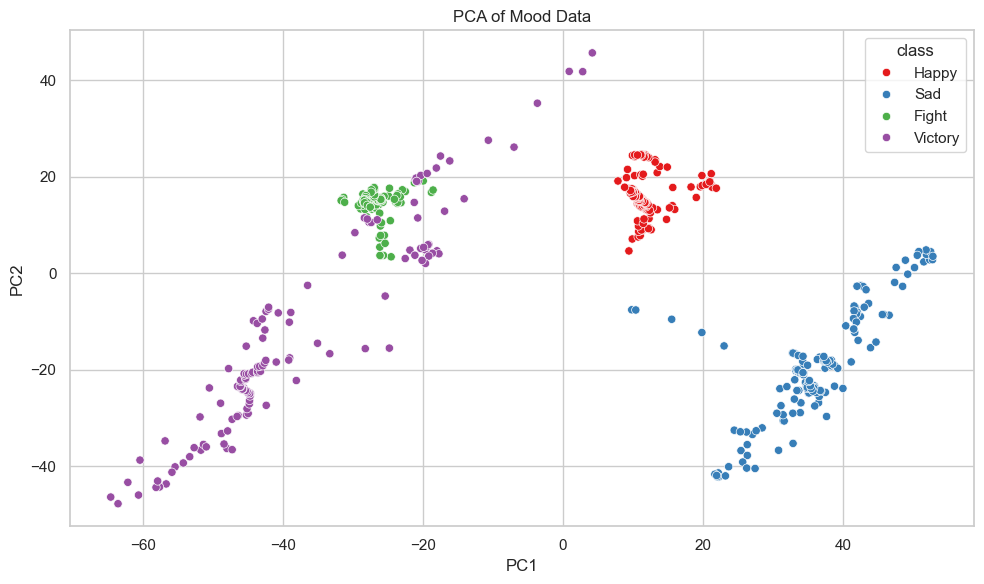

In [6]:
features = df.drop('class', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

pca_df = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])
pca_df['class'] = df['class']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="class", palette='Set1')
plt.title('PCA of Mood Data')
plt.tight_layout()
plt.show()


# Cell 7: Pairplot (Bivariate Analysis)

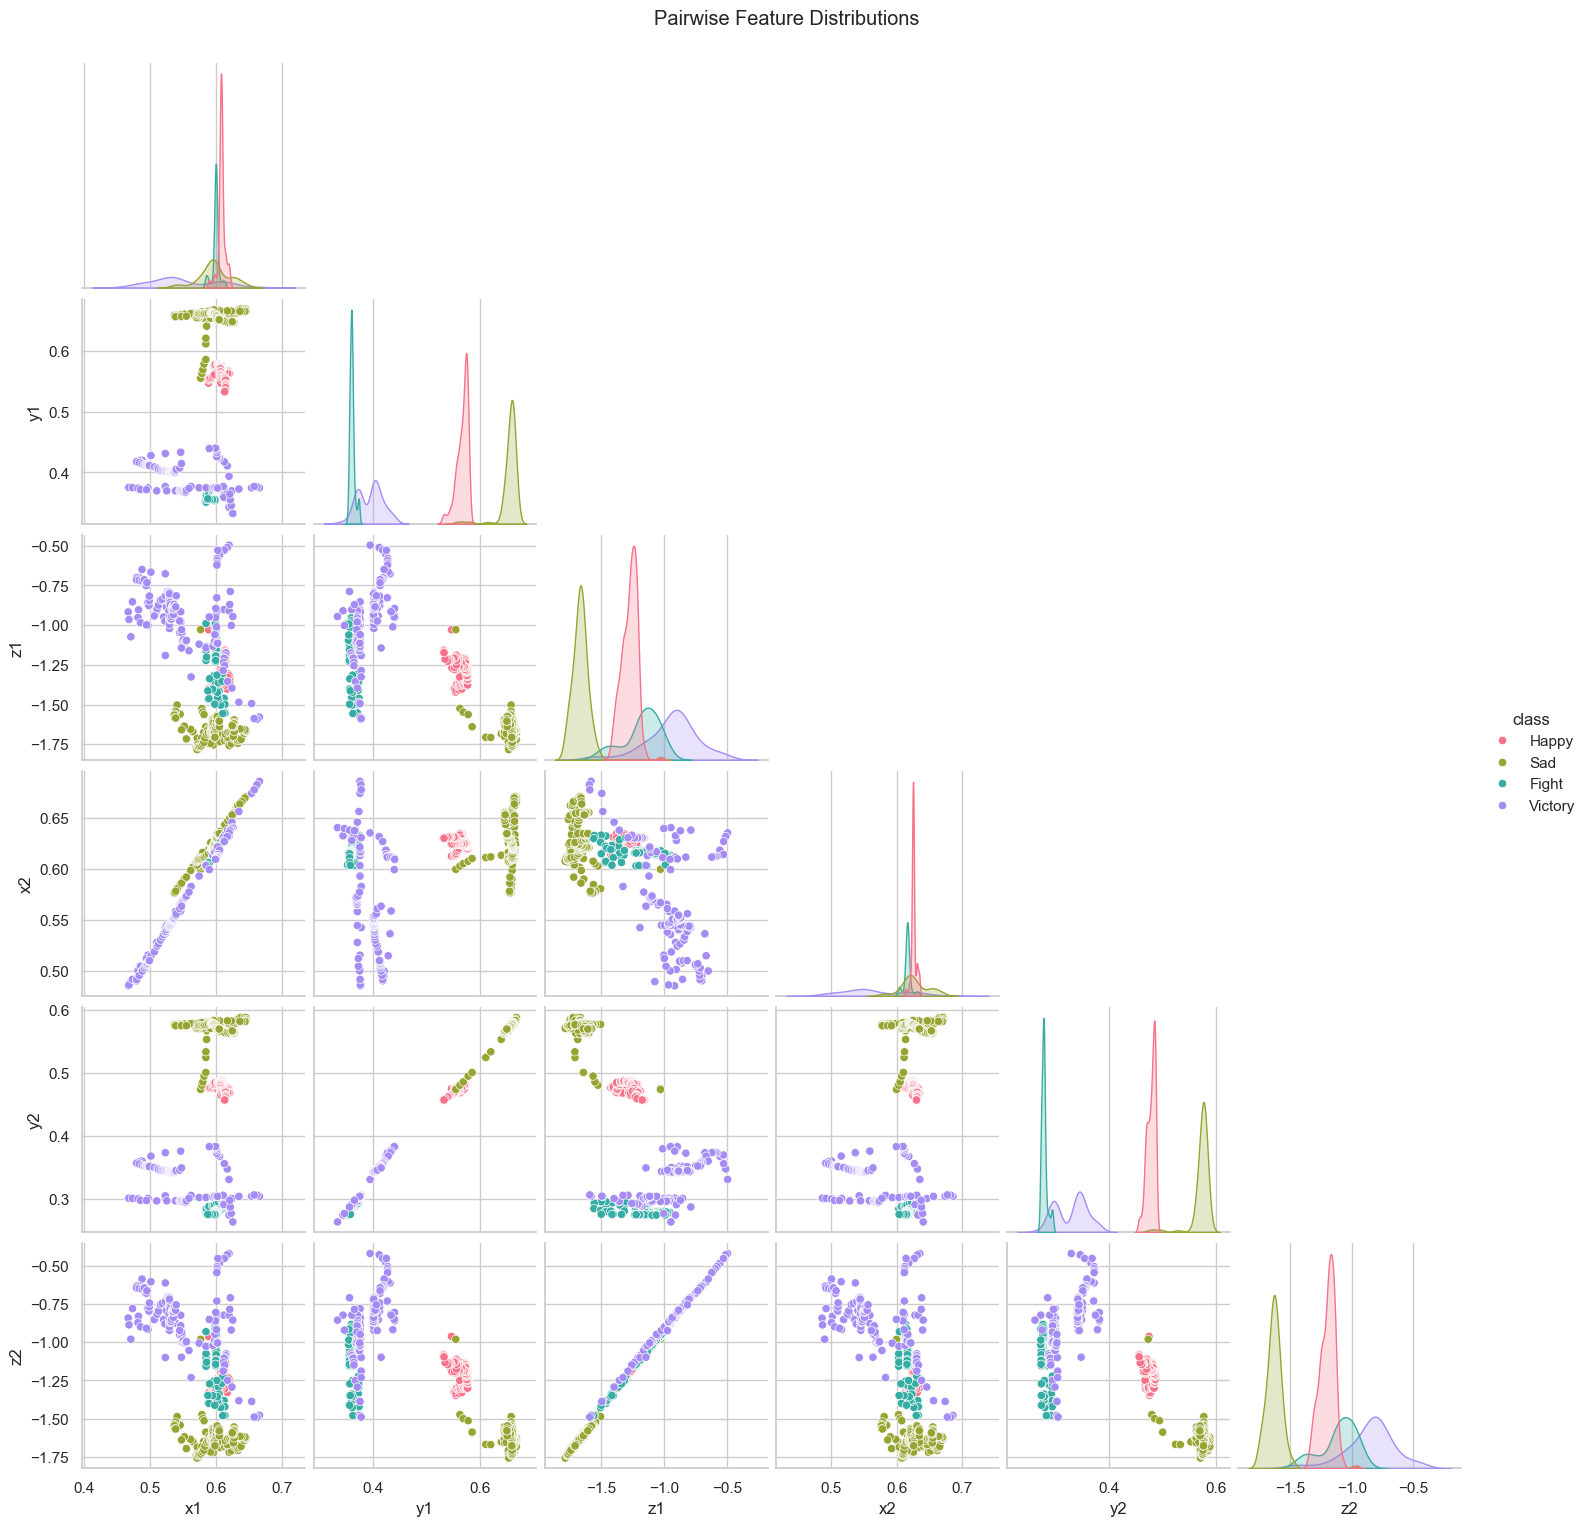

In [8]:
sample_cols = ['x1', 'y1', 'z1', 'x2', 'y2', 'z2']
sample_df = df[['class'] + sample_cols]
sns.pairplot(sample_df, hue='class', palette='husl', corner=True)
plt.suptitle("Pairwise Feature Distributions", y=1.02)
plt.show()


# Cell 8: Boxplot of x1 Feature

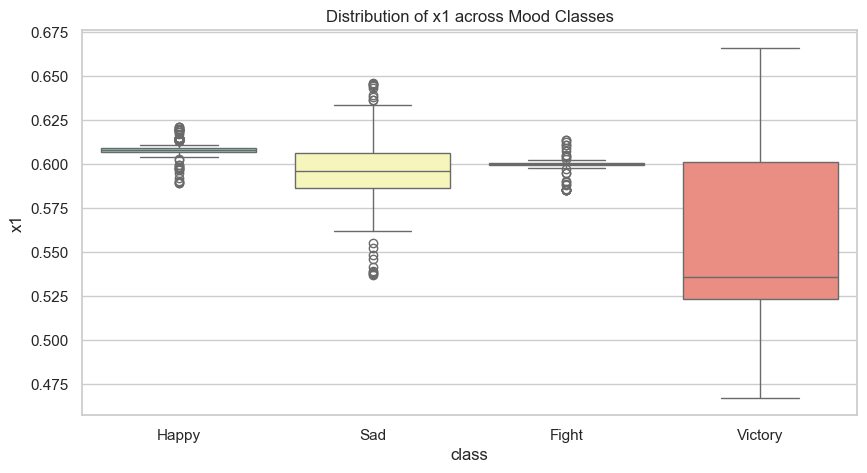

In [9]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='class', y='x1', palette='Set3')
plt.title("Distribution of x1 across Mood Classes")
plt.show()


# Cell 9: Violin Plot of z1 Feature



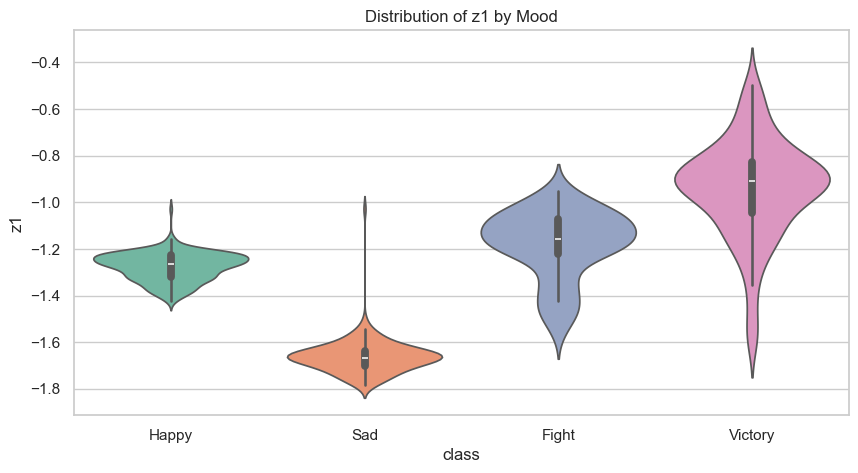

In [10]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x='class', y='z1', palette='Set2')
plt.title("Distribution of z1 by Mood")
plt.show()


# Cell 10: Heatmap of Feature Means by Class

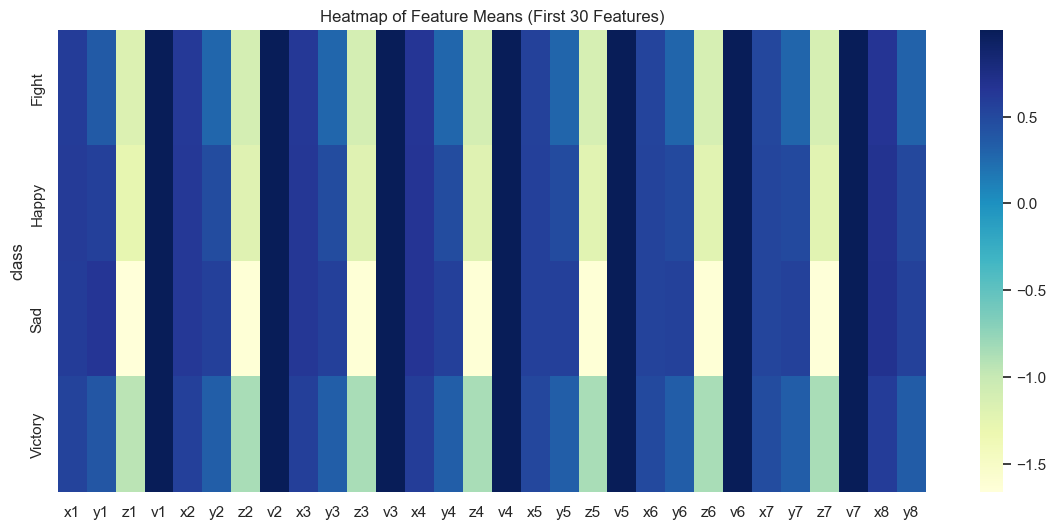

In [12]:
class_means = df.groupby("class").mean()
subset_means = class_means.iloc[:, :30]

plt.figure(figsize=(14, 6))
sns.heatmap(subset_means, cmap="YlGnBu")
plt.title("Heatmap of Feature Means (First 30 Features)")
plt.show()


# Cell 11: Correlation Heatmap for 'Happy' Class

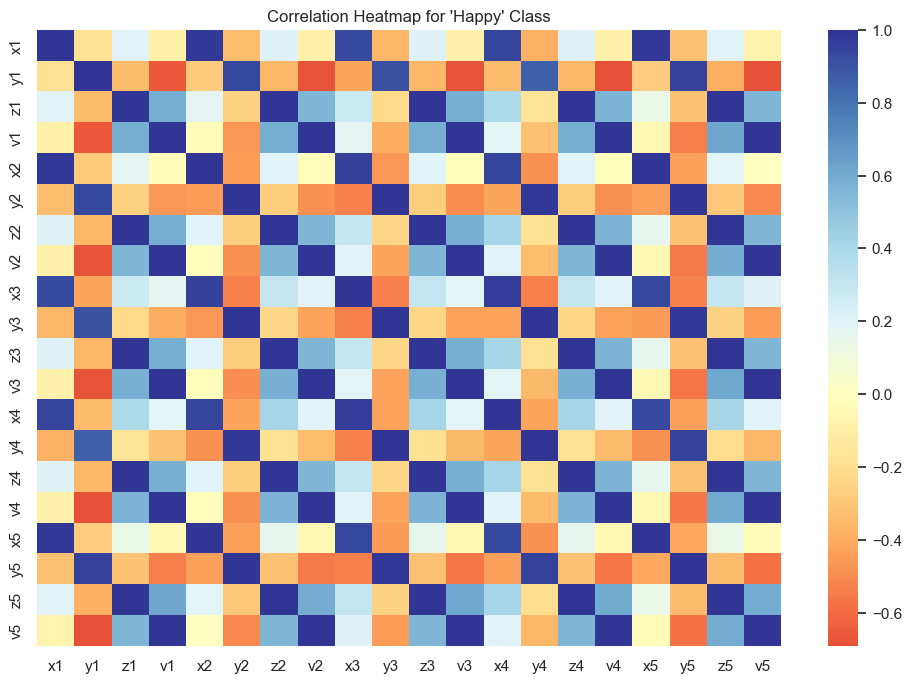

In [13]:
happy_df = df[df['class'] == 'Happy'].iloc[:, 1:21]

plt.figure(figsize=(12, 8))
sns.heatmap(happy_df.corr(), cmap='RdYlBu', center=0)
plt.title("Correlation Heatmap for 'Happy' Class")
plt.show()


# Cell 12: KDE Plot for x1 Feature



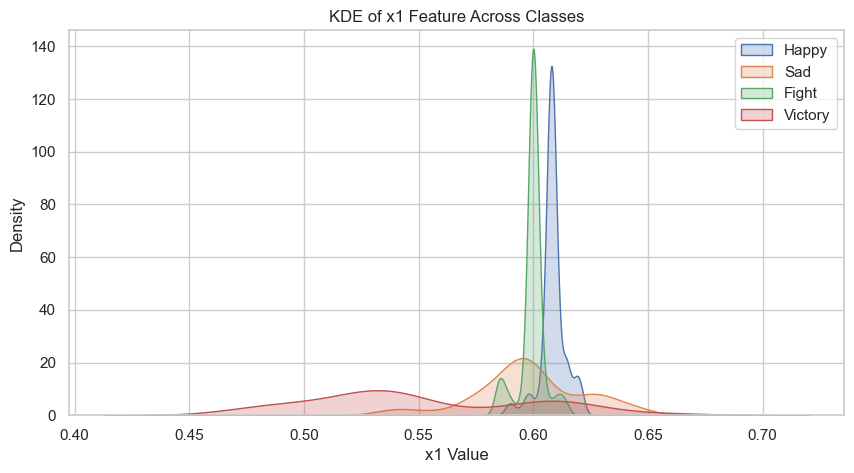

In [14]:
plt.figure(figsize=(10, 5))
for label in df['class'].unique():
    sns.kdeplot(df[df['class'] == label]['x1'], label=label, fill=True)
plt.title("KDE of x1 Feature Across Classes")
plt.xlabel("x1 Value")
plt.ylabel("Density")
plt.legend()
plt.show()


# Cell 13: 3D Scatter Plot (x1, y1, z1)

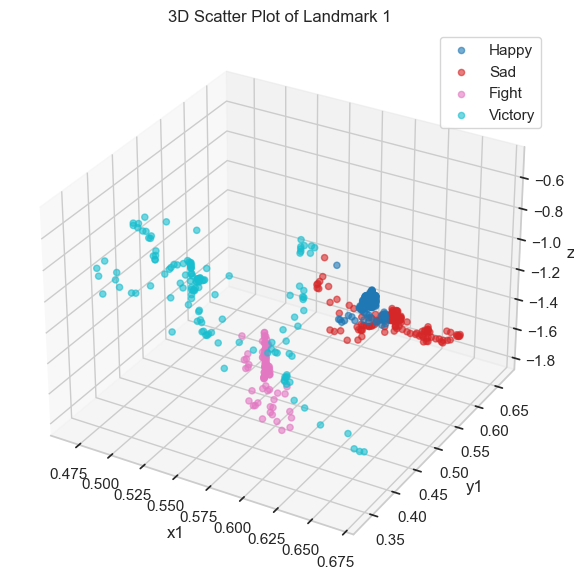

In [15]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
classes = df['class'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(classes)))

for label, color in zip(classes, colors):
    subset = df[df['class'] == label]
    ax.scatter(subset['x1'], subset['y1'], subset['z1'], label=label, color=color, s=20, alpha=0.6)

ax.set_xlabel('x1')
ax.set_ylabel('y1')
ax.set_zlabel('z1')
ax.set_title('3D Scatter Plot of Landmark 1')
ax.legend()
plt.show()
